In [29]:
from keras.layers import Conv2D, Dropout, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, load_model
from tensorflow.keras import layers
from keras.models import Sequential
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import optimizers 
from keras import metrics 
from keras import losses 
import tensorflow as tf
from os import listdir
import numpy as np
import PIL
import cv2
import time
import glob
import os



In [44]:
#data_gen = ImageDataGenerator(    rotation_range=10, 
#                                   width_shift_range=0.05, 
#                                   height_shift_range=0.05, 
#                                   shear_range=0.1, 
#                                   fill_mode='nearest',
#                                   interpolation_order=5
#                               )

#augmented_image_paths=glob.glob(r'C:\Users\Dell\Envs\PES_AI_PIP\Train_Data\**\*DWI.jpg', recursive=True)
#number_of_augs=10
#for name in augmented_image_paths:
#    image_path=name
#    image=cv2.imread(image_path)
#    image = image.reshape((1,)+image.shape)
#    save_image_as = 'Aug_'+ image_path.split('\\')[-1][:-4]
#   save_folder_as=image_path.split('\Case')[0]
#    i=1
#    for batch in data_gen.flow(x=image, batch_size=1, save_to_dir=save_folder_as, save_prefix=save_image_as, save_format='jpg'):
#        i += 1
#       if i>number_of_augs:
#           break


In [117]:
def labels_list(image_path_list):
    label_list=[]
    for image_path in image_path_list:
        label=image_path.split('\\')[-2]
        label_list.append(label)
    return label_list

#to return a nuemeric label i.e. index of it in the folders list
def label_map(image_path,label_name_list):
    label_name=image_path.split('\\')[-2]
    return label_name_list.index(label_name)

def find_index(image_path):
    i=image_path.split('\\')[-2]
    
    if i=='Bilateral cerebellar hemispheres': 
        return 0
    if i=='Bilateral frontal lobes':
        return 1
    if i=='Bilateral occipital lobes':
        return 2
    if i=='Brainstem':
        return 3
    if i=='Dorsal aspect of pons': 
        return 4
    if i=='Left centrum semi ovale and right parietal lobe':
        return 5
    if i=='Left cerebellar':
        return 6
    if i=='Left corona radiata':    
        return 7
    if i=='Left frontal lobe':  
        return 8
    if i=='Left frontal lobe in precentral gyral location':
        return 9
    if i=='Left fronto parietal':
        return 10
    if i=='Left insula':
        return 11
    if i=='Left occipital and temporal lobes':
        return 12
    if i=='Left occipital lobe':
        return 13
    if i=='Left parietal lobe':
        return 14
    if i=='Left thalamic':
        return 15
    if i=='Medial part of right frontal and parietal lobes':
        return 16
    if i=='Medula oblongata-left':
        return 17
    if i=='Mid brain on right side':
        return 18
    if i=='Pons-left':
        return 19
    if i=='Pontine-right':
        return 20
    if i=='Posterior limb of left internal capsule':
        return 21
    if i=='Right anterior thalamic': 
        return 22
    if i=='Right cerebellar hemisphere': 
        return 23
    if i=='Right corona radiata':
        return 24
    if i=='Right frontal lobe':  
        return 25
    if i=='Right fronto-parieto-temporo- occipital lobes':      
        return 26
    if i=='Right ganglio-capsular region':
        return 27
    if i=='Right insula': 
        return 28
    if i=='Right lentiform nucleus':   
        return 29
    if i=='Right occipital lobe':
        return 30
    if i=='Right parietal lobe':   
        return 31
    if i=='Right putamen':  
        return 32
    if i=='Right temporal lobe': 
        return 33
    if i=='Right thalamus':
        return 34
    if i=='Splenium of the corpus callosum': 
        return 35
    
def load_data(image_path_list, image_size, label_name_list):
    X = []
    y = []
    image_width, image_height = image_size
    
    for image_path in image_path_list:
        image = cv2.imread(image_path)
        image = cv2.resize(image, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
        image = image / 255.
        X.append(image)
        #returns the index==label number of brain location folders
        #label_num=label_map(image_path,label_name_list)
        index=find_index(image_path)
        y.append(index) 
        
    X = np.array(X)
    y = np.array(y)
    
    # Shuffle the data
    X, y = shuffle(X, y)
    
    print(f'Number of examples is: {len(X)}')
    print(f'X shape is: {X.shape}')
    print(f'y shape is: {y.shape}')
    #print(y)

    return X, y

train_image_paths_list=glob.glob(r'C:\Users\Dell\Envs\PES_AI_PIP\Train_Data_31\**\*.jpg', recursive=True)
test_image_paths_list=glob.glob(r'C:\Users\Dell\Envs\PES_AI_PIP\test\**\*.jpg', recursive=True)

#returns list of label names of brain location folders i.e. train_image_paths_list=all the possible labels
label_name_list=labels_list(train_image_paths_list)
#label_name_list_test= labels_list(test_image_paths_list)

IMG_WIDTH, IMG_HEIGHT = (128, 128)

X_train, y_train = load_data(train_image_paths_list, (IMG_WIDTH, IMG_HEIGHT), label_name_list)
X_test, y_test = load_data(test_image_paths_list, (IMG_WIDTH, IMG_HEIGHT), label_name_list)



Number of examples is: 1115
X shape is: (1115, 128, 128, 3)
y shape is: (1115,)
Number of examples is: 10
X shape is: (10, 128, 128, 3)
y shape is: (10,)


In [118]:
from keras.regularizers import l2
def try_model(X_train,y_train):
    
    model = Sequential()
    
    model.add(Conv2D(64, kernel_size=(5,5), activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)))
    model.add(MaxPooling2D(pool_size=(4,4)))
    
    model.add(Conv2D(64, kernel_size=(5,5), activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)))
    model.add(MaxPooling2D(pool_size=(4,4)))

    model.add(Flatten())

    model.add(Dropout(0,5))
    
    model.add(Dense(36))

    model.add(Activation('softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
    #model.fit(X_train, y_train, batch_size =32,validation_data=(X_val,y_val),epochs=8)
    model.fit(X_train, y_train, batch_size =20,validation_split=0.2,epochs=10)
    return model

mdl=try_model(X_train,y_train)
print(mdl.summary())




Train on 892 samples, validate on 223 samples
Epoch 1/10
892/892 [==============================] - 21s 24ms/step - loss: 3.3487 - accuracy: 0.1020 - val_loss: 2.4758 - val_accuracy: 0.4305
Epoch 2/10
892/892 [==============================] - 18s 20ms/step - loss: 1.4939 - accuracy: 0.6244 - val_loss: 0.5006 - val_accuracy: 0.9148
Epoch 3/10
892/892 [==============================] - 18s 20ms/step - loss: 0.4401 - accuracy: 0.8845 - val_loss: 0.2579 - val_accuracy: 0.9058
Epoch 4/10
892/892 [==============================] - 19s 21ms/step - loss: 0.1973 - accuracy: 0.9406 - val_loss: 0.1866 - val_accuracy: 0.9283
Epoch 5/10
892/892 [==============================] - 18s 20ms/step - loss: 0.0847 - accuracy: 0.9765 - val_loss: 0.0425 - val_accuracy: 0.9910
Epoch 6/10
892/892 [==============================] - 19s 21ms/step - loss: 0.0541 - accuracy: 0.9832 - val_loss: 0.1565 - val_accuracy: 0.9507
Epoch 7/10
892/892 [==============================] - 18s 20ms/step - loss: 0.0351 - accur

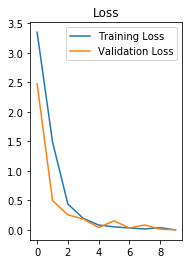

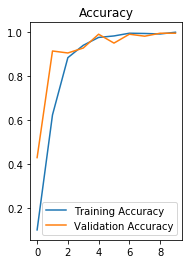

In [119]:
history = mdl.history.history

def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.subplot(121)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.subplot(122)
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

plot_metrics(history) 


In [120]:
result = mdl.predict(X_test)
print('\n')
t0=np.argmax(result[0])
t1=np.argmax(result[1])
t2=np.argmax(result[2])
t3=np.argmax(result[3])
t4=np.argmax(result[4])
t5=np.argmax(result[5])
t6=np.argmax(result[6])
t7=np.argmax(result[7])
t8=np.argmax(result[8])
t9=np.argmax(result[9])



print('The predicted output is:')
print(t0,t1,t2,t3,t4,t5,t6,t7,t8,t9)

print('The index must be: ')
print((y_test))





The predicted output is:
27 10 13 25 14 14 24 33 6 19
The index must be: 
[33 10 31 25  2 14 24  0 23  6]


In [121]:
mdl.save('pro_dl.h5')

In [ ]:
new_model.optimizer

In [ ]:
import tensorflow as tf
from tensorflow.python.framework import graph_io
from tensorflow.keras.models import load_model


# Clear any previous session.
tf.keras.backend.clear_session()

save_pb_dir = './model'
model_fname = 'pro_dl.h5'
def freeze_graph(graph, session, output, save_pb_dir='.', save_pb_name='pro_dl_frozen_model.pb', save_pb_as_text=False):
    with graph.as_default():
        graphdef_inf = tf.graph_util.remove_training_nodes(graph.as_graph_def())
        graphdef_frozen = tf.graph_util.convert_variables_to_constants(session, graphdef_inf, output)
        graph_io.write_graph(graphdef_frozen, save_pb_dir, save_pb_name, as_text=save_pb_as_text)
        return graphdef_frozen

# This line must be executed before loading Keras model.
tf.keras.backend.set_learning_phase(0) 

model = load_model(model_fname)

session = tf.keras.backend.get_session()

INPUT_NODE = [t.op.name for t in model.inputs]
OUTPUT_NODE = [t.op.name for t in model.outputs]
print(INPUT_NODE, OUTPUT_NODE)
frozen_graph = freeze_graph(session.graph, session, [out.op.name for out in model.outputs], save_pb_dir=save_pb_dir)

#!python {mo_tf_path} --input_model {pb_file} --output_dir {output_dir} --input_shape {input_shape_str} --data_type FP32

In [ ]:
import platform
is_win = 'windows' in platform.platform().lower()

# OpenVINO 2019
if is_win:
    mo_tf_path = '"C:\Program Files (x86)\IntelSWTools\openvino\deployment_tools\model_optimizer\mo_tf.py"'
else:
    # mo_tf.py path in Linux
    mo_tf_path = '/opt/intel/openvino/deployment_tools/model_optimizer/mo_tf.py'

pb_file = './model/pro_dl_frozen_model.pb'
output_dir = './model'
img_height = 128
input_shape = [1,img_height,img_height,3]
input_shape_str = str(input_shape).replace(' ','')
input_shape_str
!python {mo_tf_path} --input_model {pb_file} --output_dir {output_dir} --input_shape {input_shape_str} --data_type FP32


In [ ]:
#import os
#assert 'computer_vision_sdk' in os.environ['C:\Program Files (x86)\IntelSWTools\openvino_2019.3.379\deployment_tools\open_model_zoo\tools\accuracy_checker;C:\Program Files (x86)\IntelSWTools\openvino_2019.3.379\python\python3.7;C:\Program Files (x86)\IntelSWTools\openvino_2019.3.379\python\python3']
import sys
import os # if you want this directory
import argparse

try:
    sys.path.index(r'C:\Program Files (x86)\IntelSWTools\openvino_2019.3.379\deployment_tools\open_model_zoo\tools\accuracy_checker;C:\Program Files (x86)\IntelSWTools\openvino_2019.3.379\python\python3.7;C:\Program Files (x86)\IntelSWTools\openvino_2019.3.379\python\python3') # Or os.getcwd() for this directory
except ValueError:
    sys.path.append(r'C:\Program Files (x86)\IntelSWTools\openvino_2019.3.379\deployment_tools\open_model_zoo\tools\accuracy_checker;C:\Program Files (x86)\IntelSWTools\openvino_2019.3.379\python\python3.7;C:\Program Files (x86)\IntelSWTools\openvino_2019.3.379\python\python3')
from PIL import Image
import numpy as np
try:
    from openvino import inference_engine as ie
    from openvino.inference_engine import IENetwork, IEPlugin
except Exception as e:
    exception_type = type(e).__name__
    print("The following error happened while importing Python API module:\n[ {} ] {}".format(exception_type, e))
    sys.exit(1)

def pre_process_image(imagePath, img_height=128):
    # Model input format
   
    n, c, h, w = [1, 3, img_height, img_height]
    image = Image.open(imagePath)
    processedImg = image.resize((h, w), resample=Image.BILINEAR)

        # Normalize to keep data between 0 - 1
    processedImg = (np.array(processedImg) - 0) / 255.0

        # Change data layout from HWC to CHW
    processedImg = processedImg.transpose((2, 0, 1))
    processedImg = processedImg.reshape((n, c, h, w))

    return image, processedImg, imagePath


# Plugin initialization for specified device and load extensions library if specified.
plugin_dir = None

model_xml = './model/pro_dl_frozen_model.xml'
model_bin = './model/pro_dl_frozen_model.bin'


# Devices: GPU (intel), CPU, MYRIAD
plugin = IEPlugin("CPU", plugin_dirs=plugin_dir)
# Read IR

net = IENetwork.from_ir(model=model_xml, weights=model_bin)
assert len(net.inputs.keys()) == 1
assert len(net.outputs) == 1
input_blob = next(iter(net.inputs))
out_blob = next(iter(net.outputs))
# Load network to the plugin
exec_net= plugin.load(network=net)

del net

# Run inference
#fileName = r'C:\Users\Dell\Envs\PES_AI_PIP\check.jpg'
#image, processedImg, imagePath = pre_process_image(fileName)
#res = exec_net.infer(inputs={input_blob: processedImg})
# Access the results and get the index of the highest confidence score
#output_node_name = list(res.keys())[0]
#res = res[output_node_name]
#print(res)



# Run inference
fileName = r'C:\Users\Dell\Envs\PES_AI_PIP\Inference_Data'
for i in os.listdir(fileName):
        fileName1=(fileName+'\\'+i)

        for j in os.listdir(fileName1):
            
            if 'DWI' in j:
                fileName2=(fileName1+'\\'+j)

                image, processedImg, imagePath = pre_process_image(fileName2)
                res = exec_net.infer(inputs={input_blob: processedImg})
# Access the results and get the index of the highest confidence score
                output_node_name = list(res.keys())[0]
                res = res[output_node_name]
                idx = np.argsort(res[0])[-1]
                print(i ,":", idx)

"""ap = argparse.ArgumentParser()

args = vars(ap.parse_args())


for i, probs in enumerate(res):
    probs=np.squeeze(probs)
    top_ind=np.argsort(probs)[-args.number_top:][::-1]
    print("Image{}\n".format(args.input[i]))
    for id in top_ind:
        det_label=labels_map[id] if labels_map else "#{}".format(id)
        print("{:.7f}label{}".format(probs[id],det_label))
    print("\n")"""
    
# Predicted class index.

"""
# decode the predictions
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.applications.inception_v3 import decode_predictions
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
#scalar.fit(image)
print('Predicted:', decode_predictions(res, top=3)[0])
Xnew = scalar.transform(image)

#result = new_model.predict(Xnew)
#new_model.predict_classes(res.transpose())
"""
